## Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

import pickle

## Import dataset

In [2]:
df= pd.read_csv('to_forest_df.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,salary,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11986,0.90,0.55,3,259,10,1,0,1,2,0,0,0,0,1,0,0,0,0,0
11987,0.74,0.95,5,266,10,0,0,1,2,0,0,0,0,1,0,0,0,0,0
11988,0.85,0.54,3,185,10,0,0,1,2,0,0,0,0,1,0,0,0,0,0
11989,0.33,0.65,3,172,10,0,0,1,2,0,0,0,0,0,1,0,0,0,0


## Create Random Forest Classifier

In [3]:
random_forest = RandomForestClassifier(random_state=42)

## Prepare x and y datasets

In [4]:
x_df = df.drop('left', axis=1)
x_df

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years,salary,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11986,0.90,0.55,3,259,10,1,1,2,0,0,0,0,1,0,0,0,0,0
11987,0.74,0.95,5,266,10,0,1,2,0,0,0,0,1,0,0,0,0,0
11988,0.85,0.54,3,185,10,0,1,2,0,0,0,0,1,0,0,0,0,0
11989,0.33,0.65,3,172,10,0,1,2,0,0,0,0,0,1,0,0,0,0


In [5]:
y_df = df['left']
y_df

0        1
1        1
2        1
3        1
4        1
        ..
11986    0
11987    0
11988    0
11989    0
11990    0
Name: left, Length: 11991, dtype: int64

## Split into training and test datasets

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.25, stratify=y_df, random_state=42)

## Look for best parameters for random forest

In [7]:
# This cell is commented out because the model has already been build and is being loaded
# To create a new model, remove the asterisks to run this cell properly
# cv_params = {'max_depth': [3,5, None], 
#              'max_features': [1.0],
#              'max_samples': [0.7, 1.0],
#              'min_samples_leaf': [1,2,3],
#              'min_samples_split': [2,3,4],
#              'n_estimators': [300, 500],
#              }   
# scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
# random_forest_v1 = GridSearchCV(random_forest, cv_params, scoring=scoring, cv=4, refit='recall')

## Train Random Forest

In [8]:
#%%time
#random_forest_v1.fit(x_train, y_train) 

## Define functions to save and load models

In [9]:
def write_pickle(path, model_object, save_as:str):
    '''
    In: 
        path:         path of folder where you want to save the pickle
        model_object: a model you want to pickle
        save_as:      filename for how you want to save the model

    Out: A call to pickle the model in the folder indicated
    '''    

    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [10]:
def read_pickle(path, saved_model_name:str):
    '''
    In: 
        path:             path to folder where you want to read from
        saved_model_name: filename of pickled model you want to read in

    Out: 
        model: the pickled model 
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

## Save model

In [11]:
#write_pickle('C:/Users/atvid/OneDrive/Desktop/Data Portfolio/Salifort Motors', random_forest_v1, 'random_forest_v1')

## Load model

In [12]:
random_forest_v1 = read_pickle('C:/Users/atvid/OneDrive/Desktop/Data Portfolio/Salifort Motors', 'random_forest_v1')

In [13]:
random_forest_v1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 1.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

## Make predictions based on model

In [14]:
y_predictions = random_forest_v1.predict(x_test)

## Check results with Confusion Matrix

Text(33.0, 0.5, 'True')

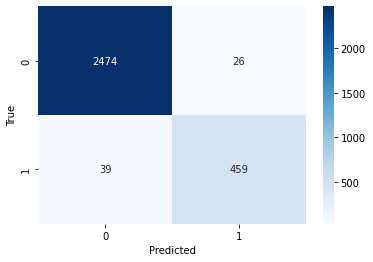

In [15]:
random_forest_confusion_matrix = confusion_matrix(y_test, y_predictions, labels=random_forest_v1.classes_)
sbn.heatmap(random_forest_confusion_matrix, fmt='d', cmap="Blues", annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')

## See performance metrics

In [16]:
print(classification_report(y_test, y_predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2500
           1       0.95      0.92      0.93       498

    accuracy                           0.98      2998
   macro avg       0.97      0.96      0.96      2998
weighted avg       0.98      0.98      0.98      2998



### After many iterations, a decision tree has been ensembled and it shows 98% recall, significantly outperforming the logistic regression.

##### The recall on the people that leaves is 92%, which means this model should identify around 92% percent of employees who leave.
##### Even considering the risk of some overfitting in this model, it's a much more suitable model with the data we have available.

## Show feature importance on random forest

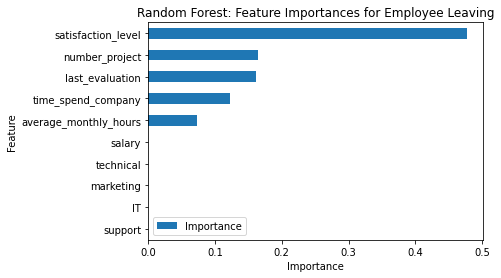

In [17]:
feat_impt = random_forest_v1.best_estimator_.feature_importances_
ind = np.argpartition(random_forest_v1.best_estimator_.feature_importances_, -10)[-10:]
feat = x_df.columns[ind]
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

#### Future lines of work may include obtaining more data on people who leave (so the dataset is more balanced) and reevaluating both models.
#### Also, reevaluating the integrity and correlation of both the satisfaction_level and the last_performance.